In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor


/Users/mauriekathan/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
train_df = pd.read_csv('./datasets/train.csv')
test_df = pd.read_csv('./datasets/test.csv')

In [3]:
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
pd.options.display.max_rows = 1000

In [6]:
pd.options.display.max_columns = 1000

## Frontage

In [7]:
not_null_frontage = train_df[train_df['Lot Frontage'].notnull()]
not_null_frontage.shape

(1721, 81)

In [8]:
frontage_math = not_null_frontage[['Lot Frontage','Lot Area','MS Zoning','Lot Shape','Lot Config','Neighborhood']]
frontage_math = pd.get_dummies(frontage_math,drop_first=True)
frontage_math.head()
# not_null_frontage[['Lot Frontage','Lot Area','MS Zoning']].sort_values(by='MS Zoning')

,Lot Frontage,Lot Area,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
1,43.0,11492,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,68.0,7922,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,73.0,9802,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,82.0,14235,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,137.0,16492,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import PolynomialFeatures

In [10]:
X = frontage_math.drop('Lot Frontage',axis=1)
y = frontage_math['Lot Frontage']

#scaling the data
# Importing packages
from sklearn.preprocessing import StandardScaler
# Setting the scaler
ss = StandardScaler()
X_sc = ss.fit_transform(X)

lasso_cv = LassoCV(normalize=True)
lasso_model = lasso_cv.fit(X_sc,y)

In [11]:
lasso_model.alpha_

0.0017171501869035532

In [12]:
lasso = Lasso(alpha=lasso_model.alpha_,normalize = True)
lasso_model_fit= lasso.fit(X_sc,y)

In [13]:
#creating datafram with variables, their coefficients and thier absolute coefficients
lasso_variable = pd.DataFrame({'Variables':X.columns,
                              'Coefficient': lasso_model_fit.coef_,
                              'Absolute Coefficient': abs(lasso_model_fit.coef_)})
# Sorting only the variable not zeroed out
pos_abscoef = lasso_variable[lasso_variable['Absolute Coefficient']>0].sort_values(by='Absolute Coefficient',ascending=False)
pos_abscoef.head(7)

,Variables,Coefficient,Absolute Coefficient
0,Lot Area,11.720041,11.720041
10,Lot Config_CulDSac,-7.334338,7.334338
13,Lot Config_Inside,-4.910429,4.910429
30,Neighborhood_NridgHt,2.925914,2.925914
11,Lot Config_FR2,-2.865836,2.865836
5,MS Zoning_RL,2.278753,2.278753
15,Neighborhood_BrDale,-2.249133,2.249133


In [14]:
frontage_math_p2 = not_null_frontage[['Lot Frontage',
                                      'Lot Area','Neighborhood']]

In [15]:
frontage_math_p2.head()

,Lot Frontage,Lot Area,Neighborhood
1,43.0,11492,SawyerW
2,68.0,7922,NAmes
3,73.0,9802,Timber
4,82.0,14235,SawyerW
5,137.0,16492,NAmes


In [16]:
frontage_math_p2['Neighborhood'].unique()

array(['SawyerW', 'NAmes', 'Timber', 'Edwards', 'BrDale', 'CollgCr',
       'Somerst', 'Mitchel', 'OldTown', 'Sawyer', 'StoneBr', 'NridgHt',
       'Gilbert', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV', 'Crawfor',
       'SWISU', 'NoRidge', 'Blmngtn', 'BrkSide', 'NPkVill', 'ClearCr',
       'Blueste', 'Greens'], dtype=object)

In [17]:
SawyerW = frontage_math_p2[frontage_math_p2['Neighborhood'] == 'OldTown']

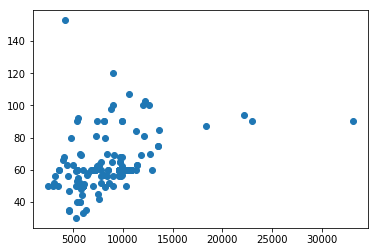

In [18]:
plt.scatter(SawyerW['Lot Area'],SawyerW['Lot Frontage'])

In [19]:
NAmes = frontage_math_p2[frontage_math_p2['Neighborhood'] == 'NAmes']

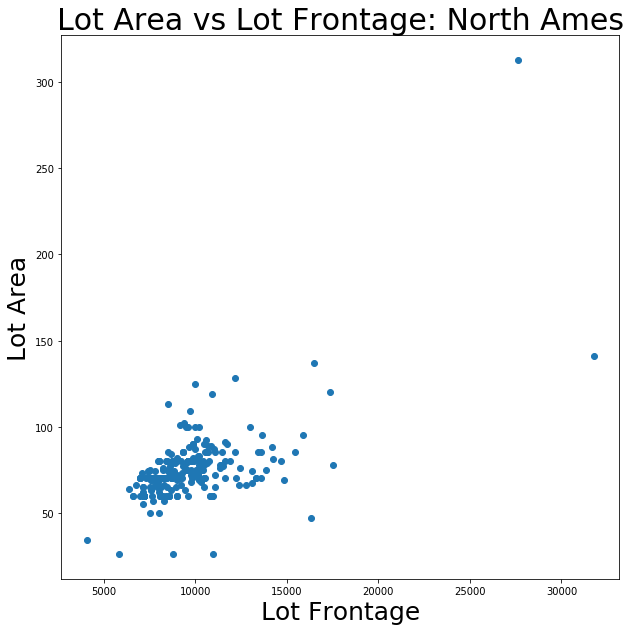

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(NAmes['Lot Area'],NAmes['Lot Frontage'])
plt.title("Lot Area vs Lot Frontage: North Ames", fontsize = 30)
#sets x and y labels with font size 25
plt.ylabel("Lot Area", fontsize = 25)
plt.
plt.xlabel("Lot Frontage", fontsize = 25);
plt.savefig('./Frontage.png',dpi=90)

In [21]:
frontage_math_p2 = pd.get_dummies(frontage_math_p2)

In [22]:
frontage_math_p2.head()

,Lot Frontage,Lot Area,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
1,43.0,11492,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,68.0,7922,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,73.0,9802,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,82.0,14235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,137.0,16492,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
null_frontage = train_df[train_df['Lot Frontage'].isnull()]
null_frontage.shape

(330, 81)

In [24]:
null_frontage_math_p2 = null_frontage[['Lot Frontage',
                                      'Lot Area','Neighborhood']]
null_frontage_math_p2 = pd.get_dummies(null_frontage_math_p2)
print(len(null_frontage_math_p2.columns))
print(len(frontage_math_p2.columns))


27
28


In [25]:
pd.DataFrame(data=[frontage_math_p2.columns, null_frontage_math_p2.columns],index=['notnull','null']).T

,notnull,null
0,Lot Frontage,Lot Frontage
1,Lot Area,Lot Area
2,Neighborhood_Blmngtn,Neighborhood_Blmngtn
3,Neighborhood_Blueste,Neighborhood_BrkSide
4,Neighborhood_BrDale,Neighborhood_ClearCr
5,Neighborhood_BrkSide,Neighborhood_CollgCr
6,Neighborhood_ClearCr,Neighborhood_Crawfor
7,Neighborhood_CollgCr,Neighborhood_Edwards
8,Neighborhood_Crawfor,Neighborhood_Gilbert
9,Neighborhood_Edwards,Neighborhood_GrnHill


In [26]:
# finding missing columns from null set
missing_cols = set(frontage_math_p2.columns) - set(null_frontage_math_p2.columns)

# for missing columns, setting this to 0 for test
for c in missing_cols:
    null_frontage_math_p2[c] = 0

In [27]:
# finding missing columns from not null set
missing_cols2 = set(null_frontage_math_p2.columns) - set(frontage_math_p2.columns)

# for missing columns, setting this to 0 for test
for c in missing_cols2:
    frontage_math_p2[c] = 0

In [28]:
frontage_math_p2.shape

(1721, 30)

In [29]:
pd.DataFrame(data=[frontage_math_p2.columns, null_frontage_math_p2.columns],index=['notnull','null']).T

,notnull,null
0,Lot Frontage,Lot Frontage
1,Lot Area,Lot Area
2,Neighborhood_Blmngtn,Neighborhood_Blmngtn
3,Neighborhood_Blueste,Neighborhood_BrkSide
4,Neighborhood_BrDale,Neighborhood_ClearCr
5,Neighborhood_BrkSide,Neighborhood_CollgCr
6,Neighborhood_ClearCr,Neighborhood_Crawfor
7,Neighborhood_CollgCr,Neighborhood_Edwards
8,Neighborhood_Crawfor,Neighborhood_Gilbert
9,Neighborhood_Edwards,Neighborhood_GrnHill


In [30]:
frontage_math_p2 = frontage_math_p2.reindex(sorted(frontage_math_p2.columns), axis=1)
frontage_math_p2.head()

,Lot Area,Lot Frontage,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
1,11492,43.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,7922,68.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,9802,73.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,14235,82.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,16492,137.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
null_frontage_math_p2 = null_frontage_math_p2.reindex(sorted(null_frontage_math_p2.columns), axis=1)
null_frontage_math_p2.head()

,Lot Area,Lot Frontage,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,13517,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,12160,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,15783,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
23,7980,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27,11700,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
pd.DataFrame(data=[frontage_math_p2.columns, null_frontage_math_p2.columns],index=['notnull','null']).T

,notnull,null
0,Lot Area,Lot Area
1,Lot Frontage,Lot Frontage
2,Neighborhood_Blmngtn,Neighborhood_Blmngtn
3,Neighborhood_Blueste,Neighborhood_Blueste
4,Neighborhood_BrDale,Neighborhood_BrDale
5,Neighborhood_BrkSide,Neighborhood_BrkSide
6,Neighborhood_ClearCr,Neighborhood_ClearCr
7,Neighborhood_CollgCr,Neighborhood_CollgCr
8,Neighborhood_Crawfor,Neighborhood_Crawfor
9,Neighborhood_Edwards,Neighborhood_Edwards


In [33]:
from sklearn.pipeline import Pipeline
features= frontage_math_p2.columns.drop(['Neighborhood_Veenker','Lot Frontage'])
X_train = frontage_math_p2[features]

X_test = null_frontage_math_p2[features]
y_train = frontage_math_p2['Lot Frontage']
y_train = np.log(y_train)

pipe_lr = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LinearRegression())
]) 

In [34]:
pipe_lr.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [35]:
pipe_lr.score(X_train,y_train)

0.5204887696378409

In [36]:
train_df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

### Checking for outliers

After reading the data description I have decided to remove these large houses which are pretty cheap as the data description suggests that they a true outlier.

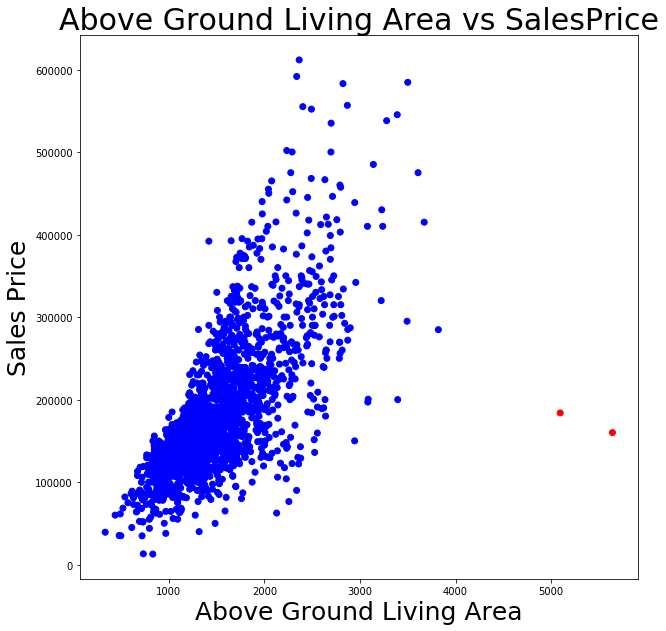

In [37]:
plt.figure(figsize=(10,10))
colors = np.where(train_df['Gr Liv Area'] > 4000,'red','blue')
plt.scatter(train_df['Gr Liv Area'],train_df['SalePrice'],c=colors)
plt.title("Above Ground Living Area vs SalesPrice", fontsize = 30)
#sets x and y labels with font size 25
plt.ylabel("Sales Price", fontsize = 25)
plt.xlabel("Above Ground Living Area", fontsize = 25);
plt.savefig('./Outliers.png',dpi=100)

In [38]:
train_df[['Gr Liv Area','SalePrice']].sort_values(by='Gr Liv Area',ascending=False).head()

,Gr Liv Area,SalePrice
960,5642,160000
1885,5095,183850
616,3820,284700
1897,3672,415000
1035,3608,475000


In [39]:
train_df = train_df.drop(index=[960,1885],axis = 1)

In [40]:
train_df[['Gr Liv Area','SalePrice']].sort_values(by='Gr Liv Area',ascending=False).head()

,Gr Liv Area,SalePrice
616,3820,284700
1897,3672,415000
1035,3608,475000
1692,3500,584500
1939,3493,295000


## Converting The Data

In [41]:
#filling Bsmt Exposure nulls that dont make sense. AKA have a value for basement condition but not for other Basements
bsmt_ex_mask = (train_df['Bsmt Exposure'].isnull())&(train_df['Bsmt Cond'].notnull())
train_df[bsmt_ex_mask] = train_df[bsmt_ex_mask].fillna('Unknown')
bsmt_fin2_mask = (train_df['BsmtFin Type 2'].isnull())&(train_df['Bsmt Cond'].notnull())
train_df[bsmt_fin2_mask] = train_df[bsmt_fin2_mask].fillna('Unknown')
#setting a dictionary for the rest of the nulls
na_dict = {'Pool QC': 0,
       'Misc Feature' : 'None',
       'Alley': 'No Alley',
       'Fence': 'No Fence',
       'Fireplace Qu': 0,
       'Garage Finish': 'No Garage',
       'Garage Cond': 0,
       'Garage Qual': 0,
       'Garage Yr Blt': 'No Garage',
       'Garage Type': 'No Garage',
       'Bsmt Exposure': 'No Basement',
       'BsmtFin Type 2': 'No Basement',
       'BsmtFin Type 1': 'No Basement',
       'Bsmt Cond': 0,
       'Bsmt Qual': 0,
       'Mas Vnr Type': 'None',
       'Mas Vnr Area': 0,
       'Bsmt Half Bath': 0,
       'Bsmt Full Bath': 0,
       'Garage Cars': 0,
       'Garage Area': 0,
       'Bsmt Unf SF': 0,
       'BsmtFin SF 2': 0,
       'Total Bsmt SF': 0,
       'BsmtFin SF 1': 0,'Lot Frontage':9999,'Electrical':'Uknown'}
#Changing Categorical Columns that I want to be numeric
#columns
cat_num_col = ['Exter Qual','Exter Cond',
           'Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual',
          'Fireplace Qu','Garage Qual','Garage Cond','Pool QC',]
#values to fill in.
cat_num_dict = {'NA': 0,
            'No Pool': 0,
            'No Garage': 0,
            'No Basement':0,
            'No Fireplace': 0,
            'Po': 1,
            'Fa':2,
            'TA': 3,
            'Gd':4,
            'Ex':5}
#converting
train_df[cat_num_col] = train_df[cat_num_col].applymap(cat_num_dict.get)
#Creating Polynomial Features
#bedsbath
train_df = train_df.fillna(na_dict)
bedsbath= ['Bsmt Full Bath','Bsmt Half Bath',
                                'Full Bath','Half Bath',
                                 'Bedroom AbvGr']
#creating the new colums
train_df['BedsBath'] = train_df[bedsbath].sum(axis=1)
#creating a total square feet columns
train_df['Total_sq_ft']= train_df['Gr Liv Area']+train_df['Total Bsmt SF']+train_df['Low Qual Fin SF']
#removing columns I used to create polynomial
train_df = train_df.drop(columns=['Bsmt Full Bath','Bsmt Half Bath',
                                'Full Bath','Half Bath',
                                 'Bedroom AbvGr','Gr Liv Area','Total Bsmt SF','Low Qual Fin SF'])

#Changing Numerical Columns that I want to be categorical
cat_nums = ['Mo Sold', 'Yr Sold','Year Built','Year Remod/Add','MS SubClass']
train_df[cat_nums] = train_df[cat_nums].astype('str')

#get dummying
train_df = pd.get_dummies(train_df,columns=['Year Built','House Style','Bldg Type','Condition 2','Condition 1','Land Slope','Utilities',
               'Year Remod/Add','Land Contour','Lot Shape','Alley','Street','Functional','MS Zoning',
               'Lot Config','Roof Style','Heating','Exterior 1st','Central Air','Electrical','BsmtFin Type 2',
               'Fence','Misc Feature','BsmtFin Type 1','Mo Sold','Roof Matl','Yr Sold','Bsmt Exposure','Garage Finish',
               'Garage Yr Blt','Foundation','Garage Type','Mas Vnr Type','Paved Drive','Sale Type','Exterior 2nd'],
                          drop_first= True)

#filling the NAs
train_df = train_df.fillna(na_dict)

In [42]:

bsmt_ex_mask = (test_df['Bsmt Exposure'].isnull())&(test_df['Bsmt Cond'].notnull())
test_df[bsmt_ex_mask] = test_df[bsmt_ex_mask].fillna('Unknown')
bsmt_fin2_mask = (test_df['BsmtFin Type 2'].isnull())&(test_df['Bsmt Cond'].notnull())
test_df[bsmt_fin2_mask] = test_df[bsmt_fin2_mask].fillna('Unknown')
Null_dict = {'Pool QC': 0,
       'Misc Feature' : 'None',
       'Alley': 'No Alley',
       'Fence': 'No Fence',
       'Fireplace Qu': 0,
       'Garage Finish': 'No Garage',
       'Garage Cond': 0,
       'Garage Qual': 0,
       'Garage Yr Blt': 'No Garage',
       'Garage Type': 'No Garage',
       'Bsmt Exposure': 'No Basement',
       'BsmtFin Type 2': 'No Basement',
       'BsmtFin Type 1': 'No Basement',
       'Bsmt Cond': 0,
       'Bsmt Qual': 0,
       'Mas Vnr Type': 'None',
       'Mas Vnr Area': 0,
       'Bsmt Half Bath': 0,
       'Bsmt Full Bath': 0,
       'Garage Cars': 0,
       'Garage Area': 0,
       'Bsmt Unf SF': 0,
       'BsmtFin SF 2': 0,
       'Total Bsmt SF': 0,
       'BsmtFin SF 1': 0,'Lot Frontage':9999,'Electrical':'Uknown'}
test_df = test_df.fillna(na_dict)
cat_num_col = ['Exter Qual','Exter Cond',
           'Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual',
          'Fireplace Qu','Garage Qual','Garage Cond','Pool QC',]
cat_num_dict = {'NA': 0,
            'No Pool': 0,
            'No Garage': 0,
            'No Basement':0,
            'No Fireplace': 0,
            'Po': 1,
            'Fa':2,
            'TA': 3,
            'Gd':4,
            'Ex':5}
test_df[cat_num_col] = test_df[cat_num_col].applymap(cat_num_dict.get)
test_df[cat_num_col] = test_df[cat_num_col].astype('float')
test_df = test_df.fillna(na_dict)
bedsbath= ['Bsmt Full Bath','Bsmt Half Bath',
                                'Full Bath','Half Bath',
                                 'Bedroom AbvGr']
test_df['BedsBath'] = test_df[bedsbath].sum(axis=1)
cat_nums = ['Mo Sold', 'Yr Sold','Year Built','Year Remod/Add','MS SubClass']
test_df[cat_nums] = test_df[cat_nums].astype('str')
test_df['Total_sq_ft']= test_df['Gr Liv Area']+test_df['Total Bsmt SF']+test_df['Low Qual Fin SF']
test_df = test_df.drop(columns=['Bsmt Full Bath','Bsmt Half Bath',
                                'Full Bath','Half Bath',
                                 'Bedroom AbvGr','Gr Liv Area','Total Bsmt SF','Low Qual Fin SF'])
test_df = pd.get_dummies(test_df,columns=['Year Built','House Style','Bldg Type','Condition 2','Condition 1','Land Slope','Utilities',
               'Year Remod/Add','Land Contour','Lot Shape','Alley','Street','Functional','MS Zoning',
               'Lot Config','Roof Style','Heating','Exterior 1st','Central Air','Electrical','BsmtFin Type 2',
               'Fence','Misc Feature','BsmtFin Type 1','Mo Sold','Roof Matl','Yr Sold','Bsmt Exposure','Garage Finish',
               'Garage Yr Blt','Foundation','Garage Type','Mas Vnr Type','Paved Drive','Sale Type','Exterior 2nd'],
                          drop_first= True)

#adding columns to test if not in train
missing_cols = set(train_df.columns) - set(test_df.columns)
# for missing columns, setting this to 0 for test
for c in missing_cols:
    test_df[c] = 0

In [43]:
#adding columns to train if not in test
missing_cols = set(test_df.columns) - set(train_df.columns)
# for missing columns, setting this to 0 for test
for c in missing_cols:
    train_df[c] = 0

In [44]:
#Setting up to apply frontage regression. Dummying Neighborhoods
train_df = pd.get_dummies(train_df,columns=['Neighborhood'])
#dropping a the same column from both data set
train_df = train_df.drop('Neighborhood_Veenker',axis=1)
test_df = pd.get_dummies(test_df,columns=['Neighborhood'])
test_df = test_df.drop('Neighborhood_Veenker',axis=1)

In [45]:
#filling in missing columns in case the neighborhoods were different
#code inspired from Kate Dowdy
missing_cols = set(test_df.columns) - set(train_df.columns)
# for missing columns, setting this to 0 for test
for c in missing_cols:
    train_df[c] = 0
missing_cols = set(train_df.columns) - set(test_df.columns)
# for missing columns, setting this to 0 for test
for c in missing_cols:
    test_df[c] = 0

#sorting so the values are in the same order for regression
train_df = train_df.reindex(sorted(train_df.columns), axis=1)

In [46]:
test_df = test_df.reindex(sorted(test_df.columns), axis=1)

In [47]:
#Setting the X for the null value regression in train set
X_test = train_df[['Lot Area', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
   'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
   'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
   'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill',
   'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
   'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
   'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
   'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
   'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
   'Neighborhood_Timber']]

#defining function to impute the variable
def impute_lot_frontage(row):
    if pd.isnull(row['Lot Frontage']):
        return np.exp(pipe_lr.predict([row[features]]))[0]
    else:
        return row['Lot Frontage']
train_df['Lot Frontage'] = train_df.apply(impute_lot_frontage, axis=1)

In [48]:
#Setting the X for the null value regression in test set
X_test_t = test_df[['Lot Area', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
   'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
   'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
   'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill',
   'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
   'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
   'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
   'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
   'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
   'Neighborhood_Timber']]

test_df['Lot Frontage'] = test_df.apply(impute_lot_frontage, axis=1)

# Modeling

### Setting perams

In [67]:
feature = list(train_df.drop(columns=['Id','PID','SalePrice']).columns)
X = train_df[feature]
X_test_df = test_df[feature]
y = np.log(train_df['SalePrice'])

In [50]:

# Importing packages
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, LassoCV, RidgeCV, LinearRegression, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score

In [51]:
#Train test split to try different models.
X_test, X_train, y_test, y_train = train_test_split(X,y,test_size=0.05,random_state=42)

## Linear Regression

In [52]:
pipe_linreg = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LinearRegression(normalize=True))
]) 

In [53]:
pipe_linreg.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True))])

In [54]:
# Scooring the training data
cv_score = cross_val_score(pipe_linreg,X_train,y_train,cv=5)
print('CVS Train:',cv_score)
print('Mean CVS Train:',cv_score.mean())
# Scooring the testing data
cv_test_score = cross_val_score(pipe_linreg,X_test,y_test,cv=5)
print('CVS Test:',cv_test_score)
print('CVS Test:',cv_test_score.mean())

CVS Train: [0.8252809  0.75478454 0.87366335 0.8608988  0.75222489]
Mean CVS Train: 0.8133704951213396
CVS Test: [-5.05796918e+18 -3.83813829e+19 -1.08732582e+22 -2.69632463e+21
 -1.15342050e+25]
CVS Test: -2.3095636116604097e+24


Just a linear regression didnt do that well so I will test other regressions.

## Ridge

In [55]:
r_alphas = np.logspace(0,5,200)
pipe_ridreg = Pipeline([
    ('ss', StandardScaler()),
    ('rd', RidgeCV(alphas=r_alphas,normalize=True))
]) 

In [56]:
pipe_ridreg.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rd', RidgeCV(alphas=array([1.00000e+00, 1.05956e+00, ..., 9.43788e+04, 1.00000e+05]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
    scoring=None, store_cv_values=False))])

In [57]:
# Scooring the training data
cv_score = cross_val_score(pipe_ridreg,X_train,y_train,cv=5)
print('CVS Train:',cv_score)
print('Mean CVS Train:',cv_score.mean())
# Scooring the testing data
cv_test_score = cross_val_score(pipe_ridreg,X_test,y_test,cv=5)
print('CVS Test:',cv_test_score)
print('CVS Test:',cv_test_score.mean())

CVS Train: [0.88628173 0.84569842 0.86990372 0.90533074 0.84002131]
Mean CVS Train: 0.8694471822974466
CVS Test: [0.86118712 0.9063028  0.87820719 0.90181075 0.89991175]
CVS Test: 0.8894839236058634


Ridge regression did much better but I want to test other ones as well.

## Lasso

In [58]:
pipe_lassor = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LassoCV(normalize=True))
]) 

In [59]:
pipe_lassor.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False))])

In [60]:
# Scooring the training data
cv_score = cross_val_score(pipe_lassor,X_train,y_train,cv=5)
print('CVS Train:',cv_score)
print('Mean CVS Train:',cv_score.mean())
# Scooring the testing data
cv_test_score = cross_val_score(pipe_lassor,X_test,y_test,cv=5)
print('CVS Test:',cv_test_score)
print('CVS Test:',cv_test_score.mean())

CVS Train: [0.78516213 0.6872191  0.87807077 0.91708727 0.81567102]
Mean CVS Train: 0.816642057611101
CVS Test: [0.87646166 0.92168652 0.895976   0.91834878 0.90162464]
CVS Test: 0.902819519448052


## Elastic Net

In [62]:
# Set up a list of alphas to check.
enet_alphas = np.logspace(0.1,5,200)

# Set up our l1 ratio.
enet_ratio = np.linspace(0.1,1,50)


pipe_elasticr = Pipeline([
    ('ss', StandardScaler()),
    ('lr', ElasticNetCV(l1_ratio=enet_ratio ,n_alphas=100,alphas=enet_alphas, cv=5,normalize=True))
]) 

In [63]:
pipe_elasticr.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', ElasticNetCV(alphas=array([1.25893e+00, 1.33236e+00, ..., 9.44880e+04, 1.00000e+05]),
       copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=array([0.1    , 0.11837, 0.13673, 0.1551 , 0.17347, 0.19184, ...ive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0))])

In [64]:
# Scooring the training data
cv_score = cross_val_score(pipe_elasticr,X_train,y_train,cv=5)
print('CVS Train:',cv_score)
print('Mean CVS Train:',cv_score.mean())
# Scooring the testing data
cv_test_score = cross_val_score(pipe_elasticr,X_test,y_test,cv=5)
print('CVS Test:',cv_test_score)
print('CVS Test:',cv_test_score.mean())

CVS Train: [-0.01642002 -0.03773462 -0.08133642 -0.02579093 -0.03728087]
Mean CVS Train: -0.039712571747666514
CVS Test: [-2.11768241e-05 -1.36275080e-02 -3.65697826e-03 -7.10933141e-05
 -4.23504784e-03]
CVS Test: -0.004322360854397944


Elastic did the worst so I am going to use lasso for my predictions.

In [69]:
preds = pipe_lassor.predict(X_test_df)
preds = np.exp(preds)
preds[:5]

array([127236.9367968 , 173816.64201984, 194237.00993403, 122437.35190456,
       183799.73368562])

In [70]:
test_df['SalePrice']= preds

In [71]:
test_df.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley_No Alley,Alley_Pave,Alley_Unknown,BedsBath,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Bsmt Cond,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_No Basement,Bsmt Exposure_Unknown,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_No Basement,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_No Basement,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,BsmtFin Type 2_Unknown,Central Air_Y,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_Uknown,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,Fence_Unknown,Fireplace Qu,Fireplaces,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Area,Garage Cars,Garage Cond,Garage Finish_No Garage,Garage Finish_RFn,Garage Finish_Unf,Garage Qual,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_No Garage,Garage Yr Blt_1896.0,Garage Yr Blt_1900.0,Garage Yr Blt_1906.0,Garage Yr Blt_1908.0,Garage Yr Blt_1910.0,Garage Yr Blt_1914.0,Garage Yr Blt_1915.0,Garage Yr Blt_1916.0,Garage Yr Blt_1917.0,Garage Yr Blt_1918.0,Garage Yr Blt_1919.0,Garage Yr Blt_1920.0,Garage Yr Blt_1921.0,Garage Yr Blt_1922.0,Garage Yr Blt_1923.0,Garage Yr Blt_1924.0,Garage Yr Blt_1925.0,Garage Yr Blt_1926.0,Garage Yr Blt_1927.0,Garage Yr Blt_1928.0,Garage Yr Blt_1929.0,Garage Yr Blt_1930.0,Garage Yr Blt_1931.0,Garage Yr Blt_1932.0,Garage Yr Blt_1933.0,Garage Yr Blt_1934.0,Garage Yr Blt_1935.0,Garage Yr Blt_1936.0,Garage Yr Blt_1937.0,Garage Yr Blt_1938.0,Garage Yr Blt_1939.0,Garage Yr Blt_1940.0,Garage Yr Blt_1941.0,Garage Yr Blt_1942.0,Garage Yr Blt_1943.0,Garage Yr Blt_1945.0,Garage Yr Blt_1946.0,Garage Yr Blt_1947.0,Garage Yr Blt_1948.0,Garage Yr Blt_1949.0,Garage Yr Blt_1950.0,Garage Yr Blt_1951.0,Garage Yr Blt_1952.0,Garage Yr Blt_1953.0,Garage Yr Blt_1954.0,Garage Yr Blt_1955.0,Garage Yr Blt_1956.0,Garage Yr Blt_1957.0,Garage Yr Blt_1958.0,Garage Yr Blt_1959.0,Garage Yr Blt_1960.0,Garage Yr Blt_1961.0,Garage Yr Blt_1962.0,Garage Yr Blt_1963.0,Garage Yr Blt_1964.0,Garage Yr Blt_1965.0,Garage Yr Blt_1966.0,Garage Yr Blt_1967.0,Garage Yr Blt_1968.0,Garage Yr Blt_1969.0,Garage Yr Blt_1970.0,Garage Yr Blt_1971.0,Garage Yr Blt_1972.0,Garage Yr Blt_1973.0,Garage Yr Blt_1974.0,Garage Yr Blt_1975.0,Garage Yr Blt_1976.0,Garage Yr Blt_1977.0,Garage Yr Blt_1978.0,Garage Yr Blt_1979.0,Garage Yr Blt_1980.0,Garage Yr Blt_1981.0,Garage Yr Blt_1982.0,Garage Yr Blt_1983.0,Garage Yr Blt_1984.0,Garage Yr Blt_1985.0,Garage Yr Blt_1986.0,Garage Yr Blt_1987.0,Garage Yr Blt_1988.0,Garage Yr Blt_1989.0,Garage Yr Blt_1990.0,Garage Yr Blt_1991.0,Garage Yr Blt_1992.0,Garage Yr Blt_1993.0,Garage Yr Blt_1994.0,Garage Yr Blt_1995.0,Garage Yr Blt_1996.0,Garage Yr Blt_1997.0,Garage Yr Blt_1998.0,Garage Yr Blt_199

Since I didnt know how to find coefs from pipeline here it is all broken up for analysis

In [72]:
feature = list(train_df.drop(columns=['Id','PID','SalePrice']).columns)
X = train_df[feature]
X = X.fillna(0)
X_test = test_df[feature]
y = np.log(train_df['SalePrice'])
ss = StandardScaler()
X_sc = ss.fit_transform(X)
X_test_sc = ss.transform(X_test)
lasso_model = LassoCV(normalize=True)
lasso_model_fit = lasso_model.fit(X_sc,y)
lasso = Lasso(alpha=lasso_model.alpha_,normalize = True)
lasso_model_fit= lasso.fit(X_sc,y)

In [73]:
#creating datafram with variables, their coefficients and thier absolute coefficients
lasso_variable = pd.DataFrame({'Variables':X.columns,
                              'Coefficient': np.exp(lasso_model_fit.coef_),
                              'Absolute Coefficient': abs(np.exp(lasso_model_fit.coef_))})
# Sorting only the variable not zeroed out
pos_abscoef = lasso_variable[lasso_variable['Absolute Coefficient']>0].sort_values(by='Absolute Coefficient',ascending=False)
pos_abscoef.head(20)

,Variables,Coefficient,Absolute Coefficient
311,Overall Qual,1.105678,1.105678
339,Total_sq_ft,1.097363,1.097363
310,Overall Cond,1.033749,1.033749
0,1st Flr SF,1.032398,1.032398
1,2nd Flr SF,1.030449,1.030449
19,BsmtFin SF 1,1.026886,1.026886
238,Kitchen Qual,1.023822,1.023822
97,Foundation_PConc,1.023740,1.023740
109,Garage Cars,1.022152,1.022152
244,Lot Area,1.021249,1.021249


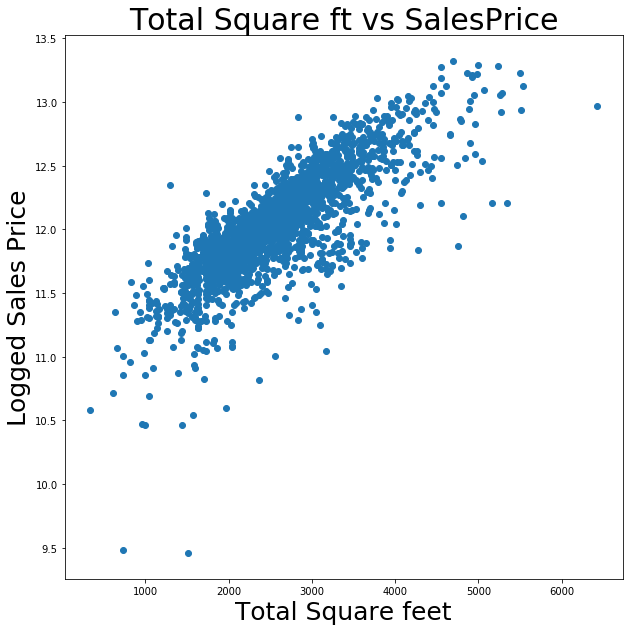

In [78]:
plt.figure(figsize=(10,10))
plt.scatter(train_df['Total_sq_ft'],np.log(train_df['SalePrice']))
plt.title("Total Square ft vs SalesPrice", fontsize = 30)
#sets x and y labels with font size 25
plt.ylabel("Logged Sales Price", fontsize = 25)
plt.xlabel("Total Square feet", fontsize = 25);
plt.savefig('./Sq_ftvlogprice.png',dpi=100)

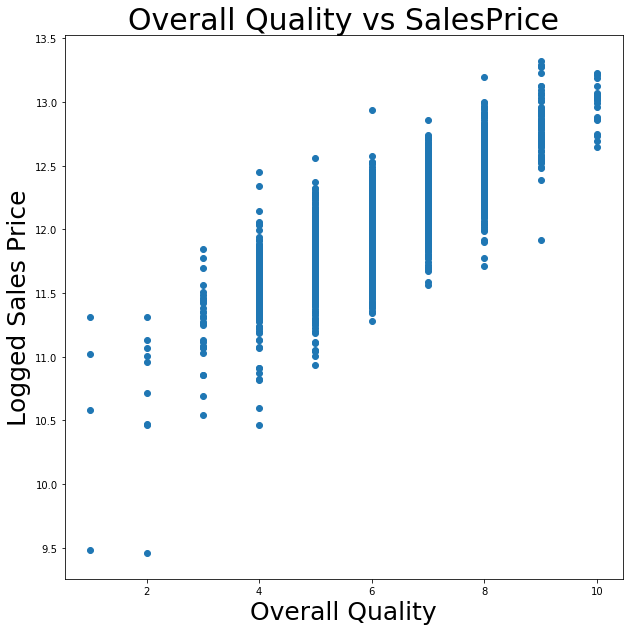

In [79]:
plt.figure(figsize=(10,10))
plt.scatter(train_df['Overall Qual'],np.log(train_df['SalePrice']))
plt.title("Overall Quality vs SalesPrice", fontsize = 30)
#sets x and y labels with font size 25
plt.ylabel("Logged Sales Price", fontsize = 25)
plt.xlabel("Overall Quality", fontsize = 25);
plt.savefig('./Qualvlogprice.png',dpi=100)

In [80]:
Submission = test_df[['Id','SalePrice']]
Submission.head()

,Id,SalePrice
0,2658,127236.936797
1,2718,173816.642020
2,2414,194237.009934
3,1989,122437.351905
4,625,183799.733686


In [81]:
Submission.to_csv('./datasets/Submission9_num.csv',index=False)